In [1]:
# Einstellungen fuer Plots
from plot.plots import * 

imagewidth = 800
plot_size = (18, 12)
half_plot_size = (18, 6)

In [2]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns
import math

from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from scipy import stats


In [3]:
# Change style according to FH
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.style.use('/Users/dboehnke/Workspaces/20190307_FHKiel_Plotstyle/fh_kiel.mplstyle')

from palettable.colorbrewer.qualitative import Paired_8 as q_map

plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#00305D'
green = '#006A4D'
orange = '#F49E00'
dark_red = '#B5123E'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#00305D', '#F49E00', '#006A4D'])
cmap_kiel2 = ListedColormap(['#00305D', '#F49E00'])


<Figure size 432x288 with 0 Axes>

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
plt.style.use('img/fh_kiel.mplstyle')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/dboehnke/opt/anaconda3/envs/FunML/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Maschinelles Lernen für Predictive Maintenance


Prof. Dr.-Ing. Daniel Böhnke, Daniel Mansfeldt, Michel Kruse

# Vorstellungsrunde 

* Name
* Firma / Tätigkeit
* Erfahrung mit Predictive Maintenance / Machine Learning

# Organisatorisches

* Ablauf:
    * Theorie Teil zu Maschinellem Lernen und PdM
    * Kurze Pause
    * Praktische Umsetzung basierend auf KNIME (Wir stellen Rechner & Problem)

* Corona:
    * Maske ist optional. 
    * Wasser und Kaffee stellen wir gerne zur Verfügung. Buffets sind zur Zeit noch schwierig. 

# Ziele des Tages

* Einführung in das Thema „Maschinelles Lernen“ und „Data Science“
* Vorstellung eines Predictive Maintenance Vorgehensmodells
* Funktionsweisen ausgewählter Modelle des Maschinellen Lernens


* Einführung in eine Data Science Software
* Eigenständige Umsetzung einer Predictive Maintenance Aufgabe


# Was werden wir heute nicht erreichen?

* Data Science ist ein weites Gebiet. In diesen wenigen Stunden kann nur ein erster Überblick entstehen.
* Es wird nicht programmiert, auch wenn dies an vielen weiterführenden Stellen zu empfehlen ist. 
* Kein Deep Learning o.ä. 
* Keine Betrachtung spezifischer Sensorsignale (Audio, Video etc.)


# Begriffsdefinition PdM

<center><img src="img/pdm_condition.png" width=80% class="stretch"></center>

* Condition Monitoring setzt die Kenntnis über den individuellen Zustand voraus.
* Predictive Maintenance erweitert dies um ein Modell, d.h. Predictive Maintenance kann auch als Modell-Based Condition Monitoring verstanden werden.


# Arten der Instandhaltung

<center><img src="img/instandhaltung.png" width=80% class="stretch"></center>



# Predictive Maintenance vs. CRISP-DM

<table style='background:white'><tr style='background:white'><td style='background:white'><img src="img/pdm.png" class="stretch"></td><td style='background:white'><img src="img/CRISP-DM_Process.png" class="stretch"></td></tr></table>

# Vorgehen Data Science

* Ich werde im Theorie Teil immer wieder springen, um die einzelnen Themen möglichst gut verknüpfen zu können. 
* Grob gesagt ist die folgende Reihenfolge zu beachten: 
    * Daten laden
    * Daten untersuchen / reparieren
    * Daten manipulieren / Feature Engineering
    * Daten splitten / Testverfahren
    * Modell trainieren
    * Modell bewerten

# Klassische Modellansätze PdM

<center><img style="float: right;" src="img/lernen.png" width=50% class="stretch"></center>

* RUL – Remaining Useful Life
    * Vorhersage der verbleibenden Lebenszeit
    * Basiert auf Regressionsansätzen
* Komponentenfehler
    * Zustand der Komponent i.O. oder defekt?
    * Basiert in der Regel auf Klassifikation
* Anomaliedetektion / Changepoint-Detektion
    * Ungewöhnliches Verhalten / Veränderung
    * Basiert auf Zeitreihen oder Klassifikationsansätzen


# Grundformel des Maschinellen Lernens

$$Y = f(X) + \epsilon$$

$$Y = \hat{f}(X)$$

* $X$ entspricht den Prediktoren (Unabhängigen Variablen, Features, Input).
* $Y$ entspricht der Antwort (Abhängige Variable, Output).
* $\epsilon$ entspricht dem zufälligen Fehlerterm mit Mittelwert $\mu = 0$.
* $f()$ ist die "unbekannte" Funktion zwischen Prediktor und Antwort.
* Wir versuchen ein $\hat{f}()$ zu bestimmen, welches $f()$ so gut wie möglich approximiert. 


# Vorhersage Triebwerkszustand

* Basierend auf der Drehzahl und der Vibration bestimmen Sie den Zustand des Triebwerks (ok, oder nicht ok)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_defekt.png" width=60% class="stretch"></center>

# Vorhersage Origin

Basierend auf Leistung und Verbrauch bestimmen Sie den Ursprungskontinent (Origin im Auto Datensatz)? Wie lauten $X$ und $Y$ für Ihre Fragestellung?

<center><img src="img/skizze_origin.png" width=60% class="stretch"></center>

# Bewerten einer Klassifikation

* Wir bewerten die Güte einer Klassifikation zunächst mittels der **Accuracy**.
* Die **Accuracy** ist die einfachste Bewertung einer Klassifikation. 

$$\text{Accuracy} = \frac{\text{Anzahl korrekter Vorhersagen}}{\text{Anzahl aller Vorhersagen}}$$

* Insbesondere bei nicht gleich-verteilten Klassen (Würfel vs. hoch zuverlässiges Triebwerk)  kommt sie an Ihre Grenzen.
* Hier macht es mehr Sinn mit den tatsächlichen Klassenergebnissen (mehr dazu folgt) zu arbeiten.


* Beispiel: Die Wahrscheinlichkeit für den Ausfall einer Pumpe liegt bei $10^{-6}$.
* Ein *perfekter* Algorithmus sagt alle Ergebnis korrekt  voraus: 

$$\text{Accuracy} = \frac{\text{999999}+\text{1}}{\text{1000000}} = 1$$

* Ein *naiver* Algorithmus sagt dann voraus:
$$\text{Accuracy} = \frac{\text{999999}+\text{0}}{\text{1000000}} = 0.999999 \approx 1$$

# Konfusions-Matrix

<center><img src="img/confmatrix.png" width=40% class="stretch"></center>

* True Positive (TP) ist die Anzahl von Datensätzen, die positiv sind und vom Modell positiv bewertet werden. 
    * im Beispiel: Alle **defekten** Triebwerke, die auch als **defekt** markiert wurden.
* False Positive (FP) ist die Anzahl von Datensätzen, die negativ sind und vom Modell positiv markiert werden. 
    * im Beispiel: Alle **nicht-defekten** Triebwerke, die als **defekt** markiert wurden.



#  Precision & Recall

* Die **Precision** ist die Accuracy auf positiven Vorhersagen. z.B.: Von $n$ defekten Triebwerken werden $x$% erkannt

$$\text{precision} = \frac{\text{TP}}{\text{TP+FP}}$$

* **Recall** entspricht dem Verhältnis von positiven Datensätzen, die korrekt erkannt wurden. z.B.: von allen positiv Getesteten hatten $x$% den Defekt.

$$\text{recall} = \frac{\text{TP}}{\text{TP+FN}}$$


# F1-Score

* Die Accuracy war zwar ungenau, ermöglicht es aber Modelle einfach miteinander zu vergleichen.
* Der F1-Score entspricht dem *harmonischen* Mittelwert von Precision und Recall.
* Das harmonische Mittel gewichtet geringe Werte stärker, d.h. für ein gutes Ergebnis müssen beide Größen *gut* sein.

$$F_1 = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}$$

* Wenn keine weiteren Informationen vorhanden sind, ist der F1-Score eine gute Optimierungsgröße.
* Im besten Fall sind die Kosten bekannt, die mit TP/FP verbunden sind,  und eine monetäre Bewertung ermöglichen. 


# Steckbrief Bewertung Klassifikation 

<center><img src="img/tafel_bewertung.png" width=60% class="stretch"></center>

# Beispiel: Auto Fuel Saver

* Autos mit einer hohen Effizienz ($mpg>30$) werden als **Fuel Saver** klassifiziert.
* Welche Eigenschaften zeichnen Fuel Saver aus?

In [5]:
# Lade den Auto Datensatz, eliminiere Missing Values
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower']) 
df['weight'] = pd.to_numeric(df['weight'])
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)

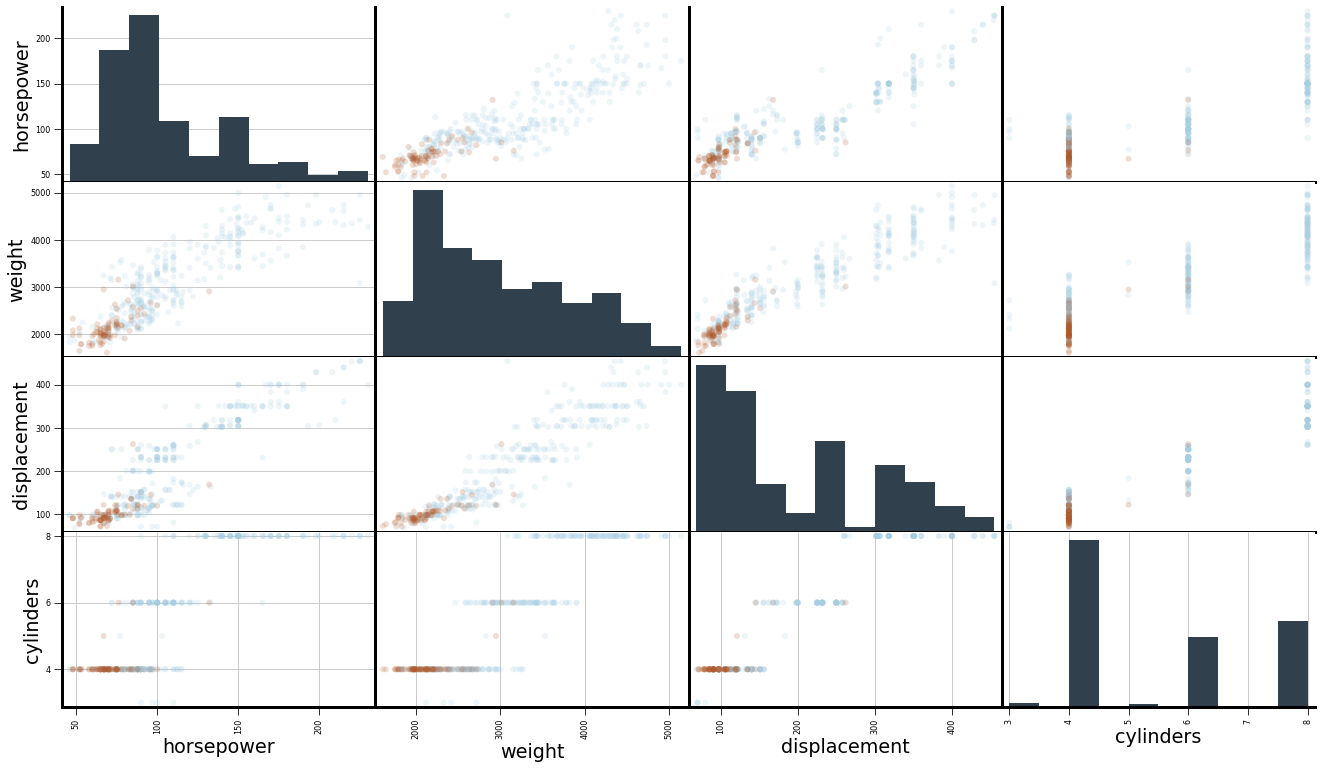

In [6]:
pd.plotting.scatter_matrix(df[['horsepower', 'weight','displacement', 'cylinders']], alpha=0.2, c=df['fuel_saver']);

# k-Nearest Neighbour

<center><img style="float: right;" src="img/knn.png" width=30% class="stretch"></center>

* Für einen Datensatz $x_0$ suchen wir die zugehörige Klasse.
* Wir wählen eine Zahl $N$ und suchen die $N$ Punkte in den Daten, die am nächsten an $x_0$ sind.
* Wir mitteln die Klassengehörigkeit aus den $N$ Punkten.

$$p(Y=y_0|X=x_0) = \frac{1}{N}\sum{I(y_i=j)}$$

# k-Nearest Neighbour II

* kNN ist ein nicht-parametrisches Modell: 
    * Wir schätzen in diesem Fall keine statistischen Parameter über unsere Daten 
    * Die Daten werden direkt in unserem Modell verwendet (Es ist unendlich-parametrisch)
* kNN ist *lazy*
    * In diesem Fall findet kein Training statt.
    * Wir wählen $N$ und unser Modell ist fertig.

# Beispiel: k-Nearest Neighbour auf Fuel Saver

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['weight', 'horsepower']].values, df['fuel_saver'])
df['prediction(fuel_saver)'] = model_knn_2.predict(df[['weight', 'horsepower']].values)

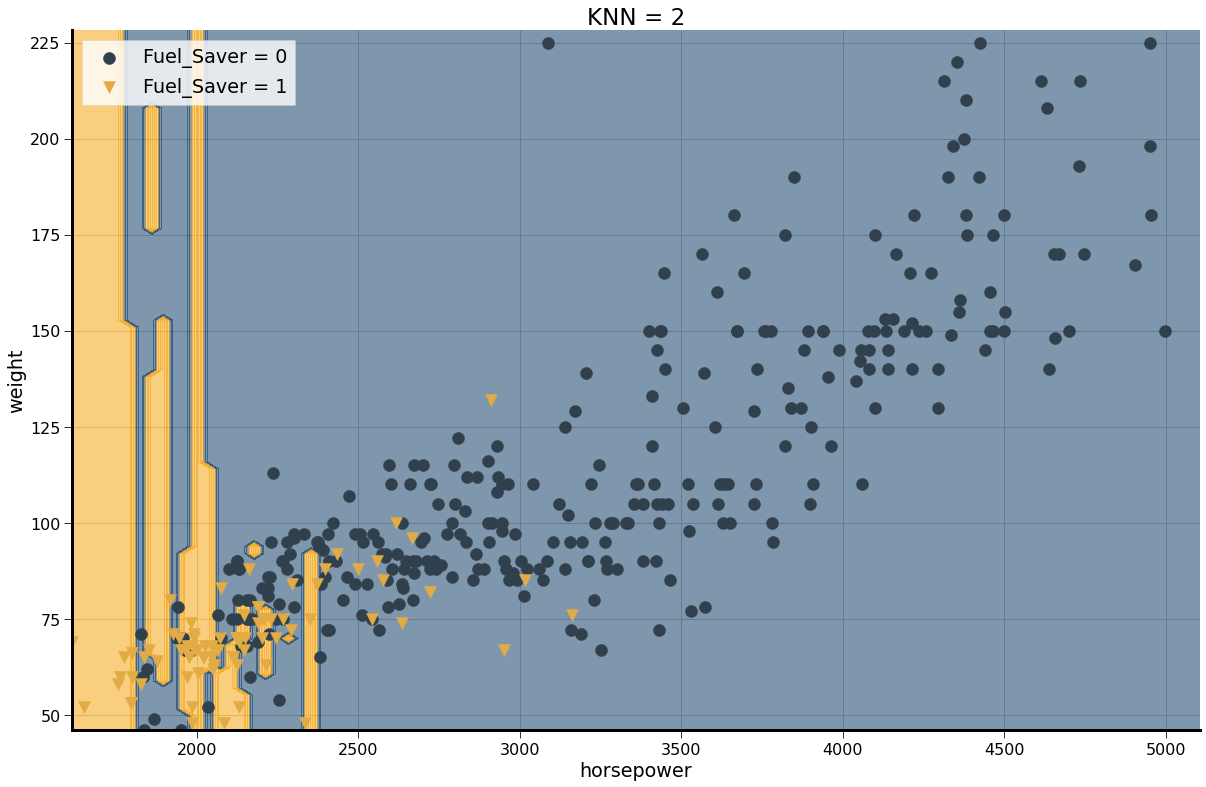

In [8]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.legend()

plt.title('KNN = 2')
plt.ylabel('weight')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# kNN mit 5 Nachbarn

In [9]:
model_knn_5 = KNeighborsClassifier(n_neighbors=5).fit(df[['weight', 'horsepower']].values, df['fuel_saver'])

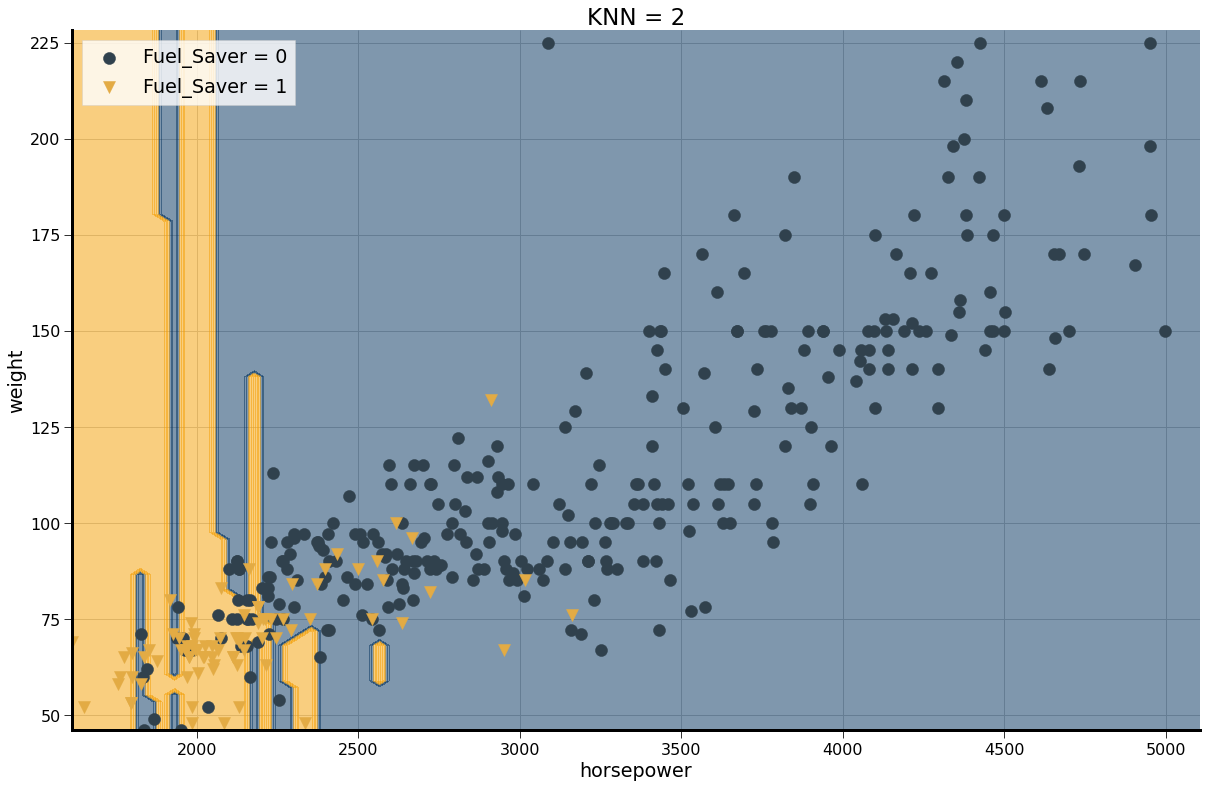

In [10]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.legend()

plt.title('KNN = 2')
plt.ylabel('weight')
plt.xlabel('horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Hyperparameter Tuning vs. Feature Engineering 


<center><img src="img/tafel_fe.png" width=30% class="stretch"></center>

* Im Feature Engineering manipulieren wir $X$, um es dem Modell einfach zu machen.
* Im Hyperparameter Tuning passen wir die Stellschrauben von $f(x)$ an, um das Modell besser zu machen.
    * z.B. verändern wir die Anzahl der Nachbarn bei einem KNN

# k als Hyperparameter 

* Die Anzahl der Nachbarn ist der erste *Hyperparameter*, den Sie kennenlernen.
* Dieser Parameter wird nicht trainiert, sondern von uns gewählt.
* Es macht Sinn diesen Wert zu "optimieren".
* Dafür ist ein Setup mit Test- und Trainingsdaten notwendig, um einen "Overfit" zu vermeiden. (Später)
* Hyperparmeter (von uns gewählt) bitte nicht mit Paramametern (vom Modell trainiert) verwechseln!

In [11]:
from sklearn.metrics import f1_score
scores = []
for i in range(2, 11):
    model_knn = KNeighborsClassifier(n_neighbors=i).fit(df[['mpg', 'horsepower']].values, df['origin'])
    f1 = f1_score(df['origin'], model_knn.predict(df[['mpg', 'horsepower']].values), average='weighted') 
    scores.append(f1)

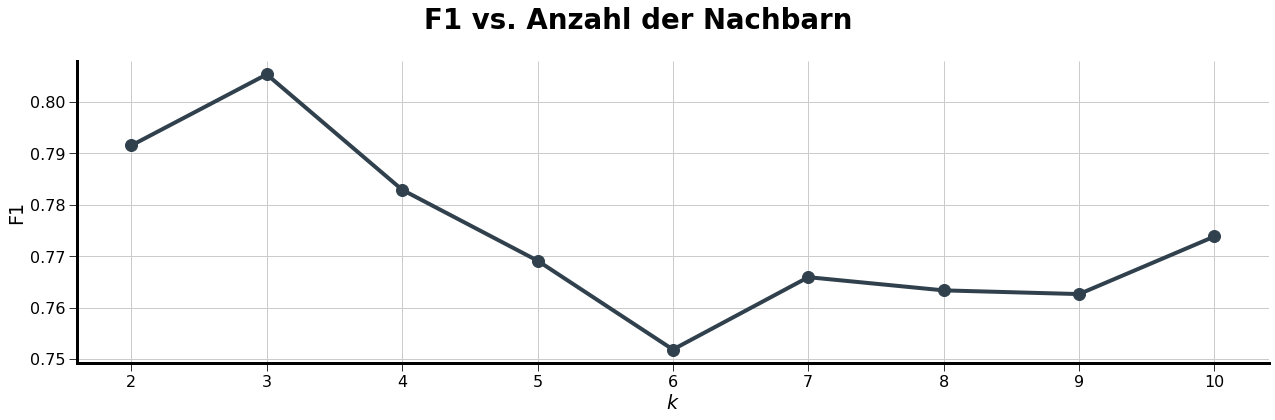

In [12]:
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(range(2, 11), scores, 'o-')

plt.xlabel('$k$')
plt.ylabel('F1')
plt.suptitle('F1 vs. Anzahl der Nachbarn')
plt.tight_layout();

# Feature Engineering

<center><img style="float: right;" src="img/tafel_fe.png" width=30% class="stretch"></center>

* Wir setzen Wissen über die Daten und Modelle ein, um neue / bessere Feature ($X$) zu bauen.
* Kombination aus statistischen und fachlichen Methoden
* Die verschiedenen Methoden des Feature Engineering sind abhängig von den vorhandenen Daten anzuwenden. Z.b werden Sie sehen, dass ein Dummy Encoding nur für qualitative Variablen sinnig ist.
* Je nachdem welche Modelle Sie verwenden, haben bestimmte Methoden des Feature Engineering einen Effekt oder nicht. z.B. profitiert k-NN stark von der Skalierung der Daten. Für den Entscheidungsbaum bringt die Skalierung keinen Unterschied. 
* Es ist daher schwer ein allgemeingültiges Beispiel für alle Fälle zu finden

# Dummy Encoding / One Hot Encoding

* Quantitative Merkmale, z.B. Horsepower, können wir einfach für unsere Modelle nutzen.
* Wie gehen wir mit qualitativen Merkmalen um?
* Problemstellung: Hinter der Gruppenzugehörigkeit gibt es keine Rangfolge!
* Der Algorithmus kann die Informationen nicht als Zahlenwerte erhalten. Andernfalls interpretiert er eine Reihenfolge
* Wir erstellen eine Dummy Encoding, das für jede Zugehörigkeit eine neue **boolsche Spalte** erstellt

# Beispiel Dummy Encoding Fuel Saver

* Sie wollen Fuel Saver klassifizieren!
* Das Feature Origin soll mit verwendet werden! Wie bringen Sie die neue Spalte ein?

In [13]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,fuel_saver,prediction(fuel_saver)
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0,0
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1,0
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,0,0
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,1,0


In [14]:
df = pd.get_dummies(df, columns=['origin'])
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,fuel_saver,prediction(fuel_saver),origin_1,origin_2,origin_3
392,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,0,0,1,0,0
393,44.0,4,97.0,52,2130,24.6,82,vw pickup,1,1,0,1,0
394,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,1,0,0
395,28.0,4,120.0,79,2625,18.6,82,ford ranger,0,0,1,0,0
396,31.0,4,119.0,82,2720,19.4,82,chevy s-10,1,0,1,0,0


# Skalierung

* Daten sind in irgendeiner Größenordnung definiert (z.B. kilo, mega, giga etc).
* Daten sind in irgendeiner Einheit definiert (z.B. Zeit in Jahren, Leistung in PS).
* Für die statistische Betrachtung ist dies nicht immer hilfreich.
* Beispiel: Der k-Means berechnet die Distanz zwischen mehreren Attributen ohne eine Kenntnis darüber zu haben, wie die Achsen zueinander skalieren.
* Eine Skalierung aller Attribute ist daher hilfreich.
* Oft verwendete Ansätze:
    * Min/Max 
    * Z-Normalisierung
    * Robustes Skalieren

## Z-Normalisierung

* Bezogen auf den Mittelwert
* Auslenkung relativ zur Standardabweichung
* Wertebereich +/- $\infty$    

$$x_{norm} = \frac{x-\mu}{\sigma}$$

## Min-Max Skalierung

* Relativ zu Extremwerten
* Anfällig für Ausreißer
* Wertebereich $0 - 1$

$$x_{norm} = \frac{x-min(x)}{max(x)-min(x)}$$

## Robust Scaler

* Viele Skalierungsmethoden sind anfällig für Ausreißer etc. 
* Der Robuste Skalierer basiert auf Median und Quantilsabständen
* Wertebereich $\pm \infty$

$$x_{norm} = \frac{x-\tilde{x}}{Q_{75}(x)-Q_{25}(x)}$$

# Skalierung Fragestellung mit KNN

* Skalierung ist offensichtlich relevant für die visuelle Interpretation der Daten
* Ist es notwendig für die Performance der Modelle?
* Vorhersage basierend auf *horsepower* und *weight*
* Beide Eingabeparameter unterscheiden sich um ca. eine Größenordnung

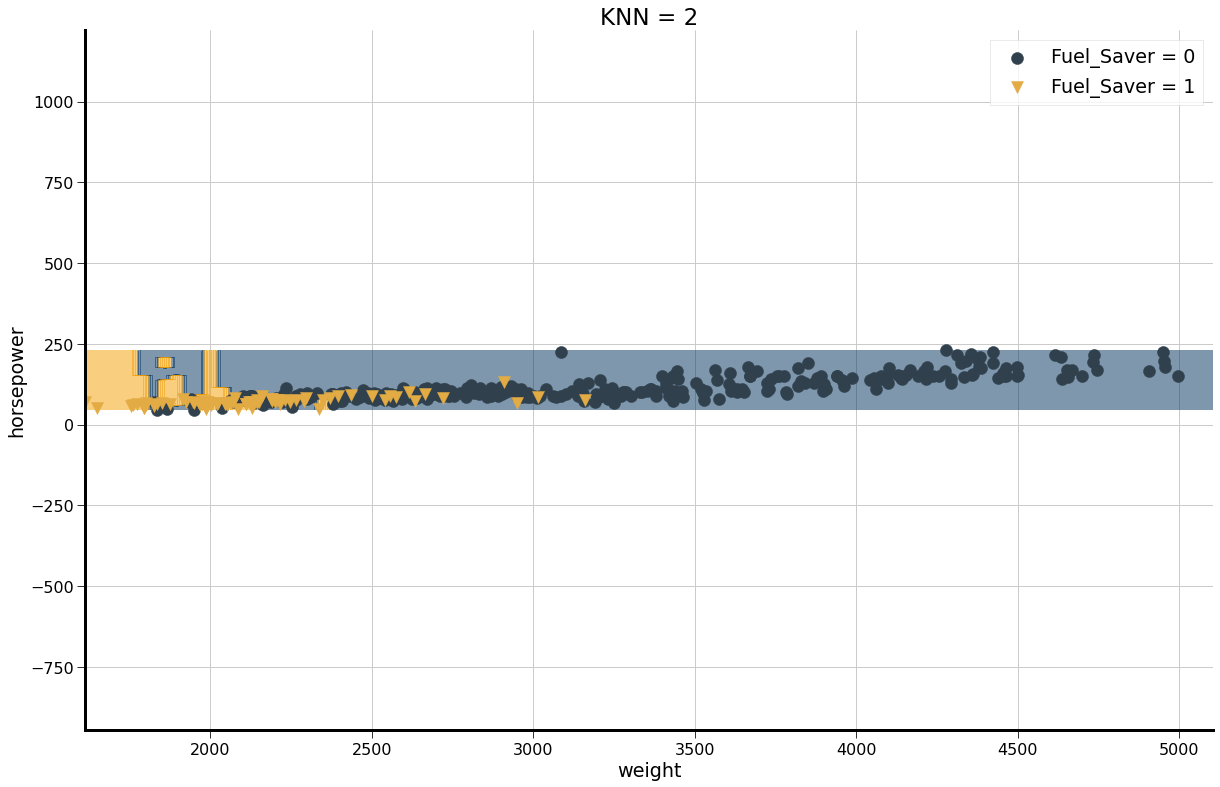

In [15]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.axis('equal')

ax.legend()

plt.title('KNN = 2')
plt.ylabel('horsepower')
plt.xlabel('weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Führe eine Z-Normalisierung durch

In [16]:
features = ['horsepower', 'weight']
df[features] = df[features].apply(lambda x: (x - x.mean()) / x.std())

In [17]:
model_knn_2 = KNeighborsClassifier(n_neighbors=2).fit(df[['weight', 'horsepower']].values, df['fuel_saver'])
df['prediction(fuel_saver)'] = model_knn_2.predict(df[['weight', 'horsepower']].values)

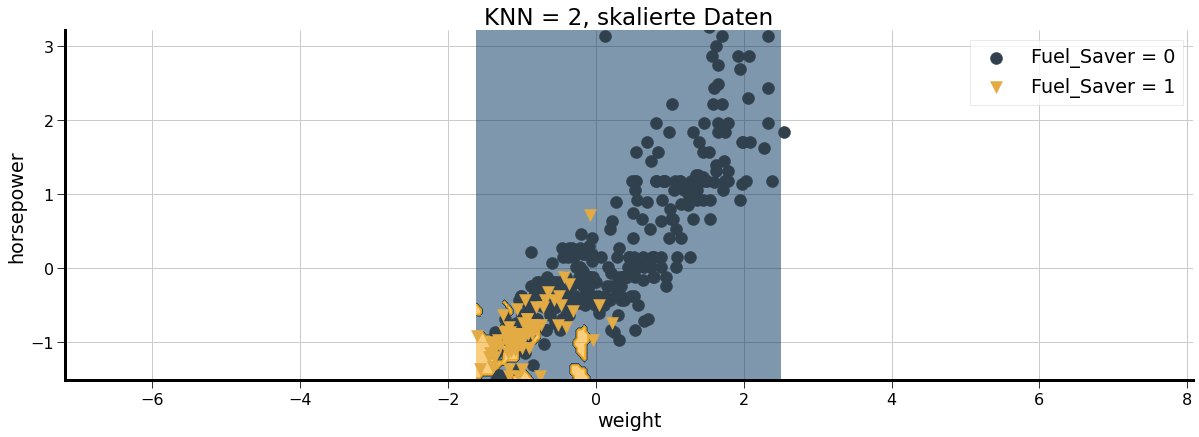

In [18]:
# Plotte die Entscheidungsgrenze

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

x_min, x_max = df['weight'].min(), df['weight'].max()
y_min, y_max = df['horsepower'].min(), df['horsepower'].max()
n = 100  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = model_knn_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].weight, df[df['fuel_saver'] == i].horsepower, marker=filled_markers[i], label='Fuel_Saver = ' + str(i))

ax.axis('equal')

ax.legend()

plt.title('KNN = 2, skalierte Daten')
plt.ylabel('horsepower')
plt.xlabel('weight')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Steckbrief KNN
<center><img src="img/steckbrief_knn.png" width=80% class="stretch"></center>

# Entscheidungsbaum

<center><img style="float: right;" src="img/tafel_baum.png" width=30% class="stretch"></center>

* Der Entscheidungbaum steht auf dem Kopf:
    * Der oberste Knoten ist die Wurzel des Baums.
    * Die untersten Knoten des Entscheidungsbaums sind Blätter.
    * An den Blättern kann das Ergebnis einer Klassifikation abgelesen werden.

* Der Entscheidungsbaum hat eine bestimmte Tiefe $n$ entstprechend den Ebenen im Baum.
* Die maximale Tiefe entspricht der maximalen Anzahl von Entscheidungen, die getroffen werden, bis ein Blatt erreicht wird.
* In jedem Knoten wird der Datensatz anhand eines der Parameter aus $X$ an einem bestimmten Schwellwert geteilt.

# Gini Index

$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$

* Der Gini Index beschreibt die Klassen-Reinheit eines Knotens.
* Über alle Klassen $k$ wird in der Region (dem Knoten) $m$ die Wahrscheinlichkeit addiert.
* Im besten Fall ist der Gini-Index sehr nah an 0.
* In unserem einfachen Fall, kommen wir schon mit Abzählen weiter.

# Beispiel: Gini Fuel Saver

* Autos mit einer hohen Effizienz ($mpg>30$) werden als **Fuel Saver** klassifiziert.
* Wie hoch ist der Gini-Index in unserem Datensatz für den obersten Knoten, d.h. für die gesamten Daten?

$$G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$$


In [19]:
p_fuelsaver = len(df[df.fuel_saver==1])/len(df)
p_fuelwaster = len(df[df.fuel_saver==0])/len(df)

p_fuelwaster, p_fuelsaver

(0.7882653061224489, 0.21173469387755103)

In [20]:
p_fuelsaver  * (1- p_fuelsaver) + p_fuelwaster * (1- p_fuelwaster)

0.33380622657226156

# CART (Classification and Regression Tree)

* In einem Entscheidungsbaum wird in jedem Knoten nach einem Parameter und an einer Schwelle eine Entscheidung getroffen, d.h. die Daten in verschiedene Äste aufgeteilt. 
* Gesucht wird der richtige Parameter $x_{1,\dots,n}$ und der richtige Schwellwert $t$

$$J(l, t_l) = \frac{m_{links}}{m}G_{links} + \frac{m_{rechts}}{m}G_{rechts}$$

* $m$ entspricht der Anzahl der verbleibenden Samples.
* $l$ entspricht dem Index des Parameter, i.e. $x_l$.
* Der Parameter, der das minimale $J$ erreicht, wird für die Entscheidung in einem Knoten gewählt.


# J(t) für den Autodatensatz

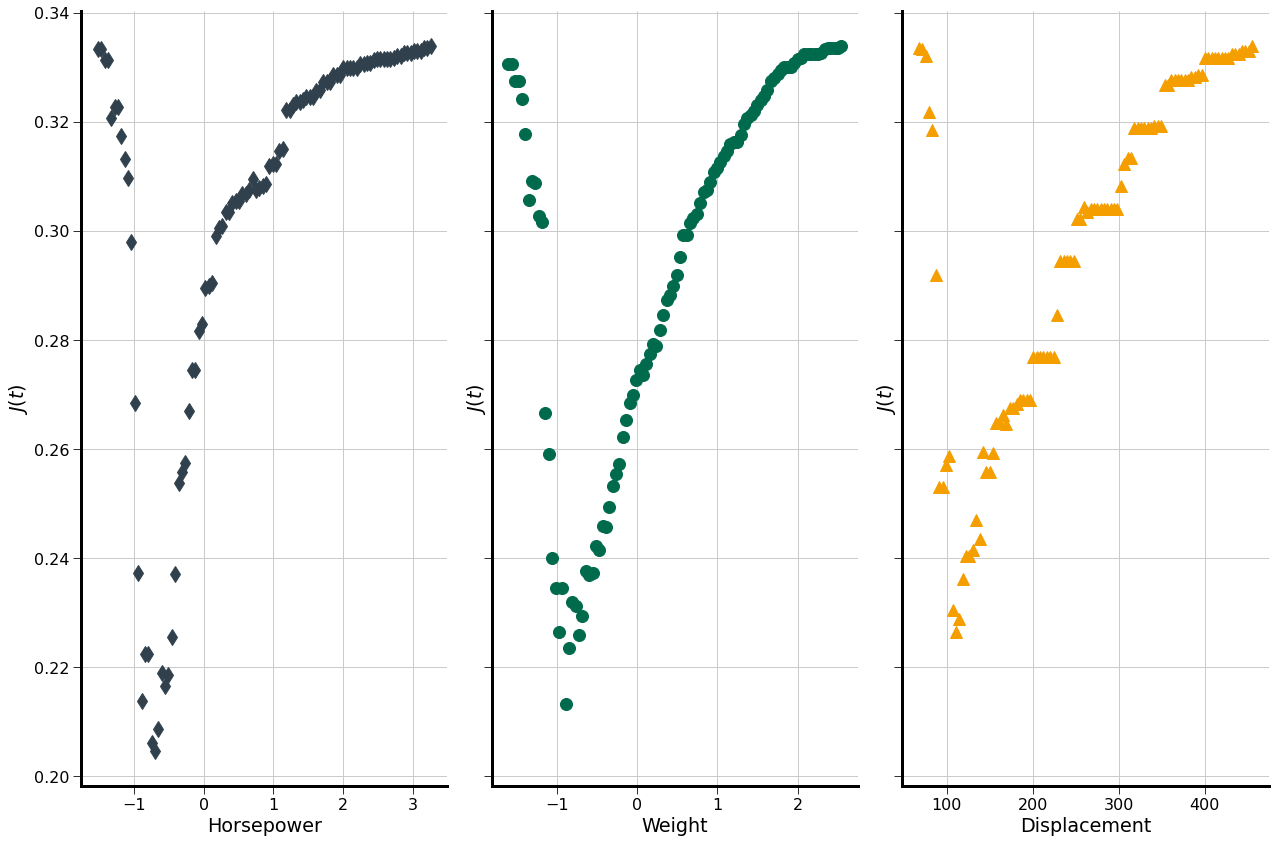

In [21]:
def gini(df):
    # Wenn der Datensatz keine Elemente enthaelt teilen wir durch null
    if len(df)==0:
        return 1
    
    # Hier unsere ursprüngliche Berechnung
    p_fuel_saver = len(df[df.fuel_saver==1])/len(df)
    p_fuel_waster = len(df[df.fuel_saver==0])/len(df)
    return p_fuel_saver*(1-p_fuel_saver)+p_fuel_waster*(1-p_fuel_waster)

m = len(df)
fig, ax = plt.subplots(1, 3, figsize=plot_size, sharey='all')

Js = []
thresholds = np.linspace(df.horsepower.min(), df.horsepower.max(), 100)
for t in thresholds:
    links, rechts = df[df.horsepower<=t], df[df.horsepower>t]
    J = len(links)/m*gini(links)+len(rechts)/m*gini(rechts)
    Js.append(J)
ax[0].plot(thresholds,Js, 'd' )
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('$J(t)$')

Js = []
thresholds = np.linspace(df.weight.min(), df.weight.max(), 100)
for t in thresholds:
    links, rechts = df[df.weight<=t], df[df.weight>t]
    J = len(links)/m*gini(links)+len(rechts)/m*gini(rechts)
    Js.append(J)
ax[1].plot(thresholds,Js, 'o', c=green )
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('$J(t)$')

Js = []
thresholds = np.linspace(df.displacement.min(), df.displacement.max(), 100)
for t in thresholds:
    links, rechts = df[df.displacement<=t], df[df.displacement>t]
    J = len(links)/m*gini(links)+len(rechts)/m*gini(rechts)
    Js.append(J)
ax[2].plot(thresholds,Js, '^', c=orange )    
ax[2].set_xlabel('Displacement')
ax[2].set_ylabel('$J(t)$')

plt.tight_layout()
plt.show()

# Entscheidungsbaum Beispiel

In [22]:
from ipywidgets import interactive
df = pd.read_csv('Auto.csv')
df['horsepower'] = np.where(df['horsepower']=='?', None, df['horsepower'])
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['weight'] = pd.to_numeric(df['weight'])
df['fuel_saver'] = np.where(df['mpg']>30, 1, 0)
# feature matrix
X = df[['horsepower', 'weight', 'displacement']]

# target vector
y = df['fuel_saver']

# class labels
labels = ['horsepower', 'weight', 'displacement']
def plot_tree( depth=2,  min_leaf=1):

    estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = depth, min_samples_leaf=min_leaf)
    estimator.fit(X, y)

    graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels
      , class_names=['fuel_waster', 'fuel_saver']
      , filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree , depth=[1,2,3,4], min_leaf=range(100))

display(inter)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 2, 3, 4), value=2), Dropdown(descript…

# Entscheidungsgrenze für den Entscheidungsbaum

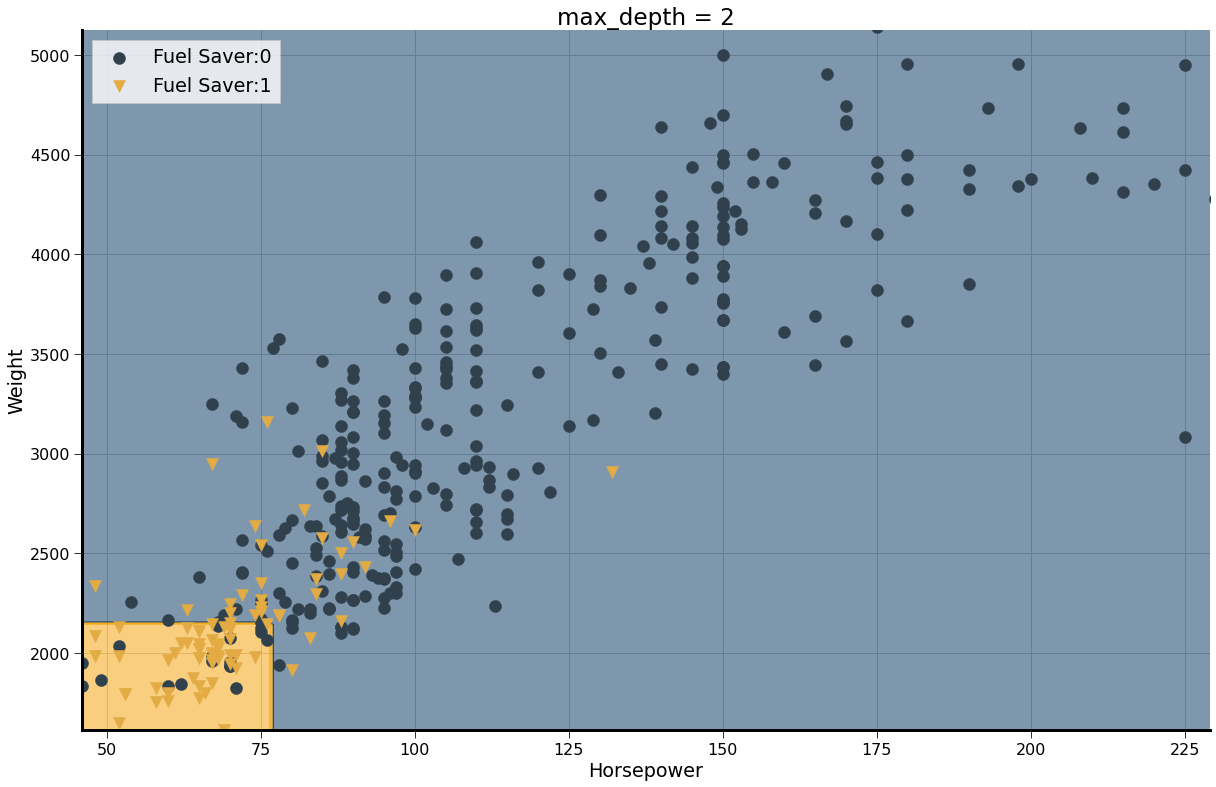

In [23]:
# feature matrix
X = df[['horsepower', 'weight']]

# target vector
y = df['fuel_saver']

# class labels
labels = ['horsepower', 'weight']

estimator = DecisionTreeClassifier(random_state = 0 , 
                                   criterion = 'gini', 
                                   max_depth = 2, 
                                   min_samples_split=0.0001,
                                   min_samples_leaf=0.0001)
estimator.fit(X.values, y)

# Plotte die Entscheidungsgrenze
fig, ax = plt.subplots(1, 1, figsize=plot_size)

x_min, x_max = df['horsepower'].min(), df['horsepower'].max()
y_min, y_max = df['weight'].min(), df['weight'].max()
n = 200  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/n), np.arange(y_min, y_max, (y_max-y_min)/n))
Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_kiel2, alpha = 0.5)

# Plot also the training points
for i in range(2):
    plt.scatter(df[df['fuel_saver'] == i].horsepower, df[df['fuel_saver'] == i].weight, marker=filled_markers[i], label='Fuel Saver:' + str(i))

plt.title('max_depth = 2')
plt.ylabel('Weight')
plt.xlabel('Horsepower')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
ax.legend()
plt.show()

# Verteilung der Klassen - Ergebnisse des Entscheidungsbaums

* Die Klassen im Autobeispiel sind nicht gleich verteilt.
* Desto ungleichmäßiger die Klassen verteilt sind, desto besser wird die Accuracy des naiven Schätzers.
* z.B. bei der Vorhersage von Maschinenfehlern oder Kreditkartenbetrug ist die Accuracy unbrauchbar.

/Users/dboehnke/opt/anaconda3/envs/FunML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/dboehnke/opt/anaconda3/envs/FunML/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


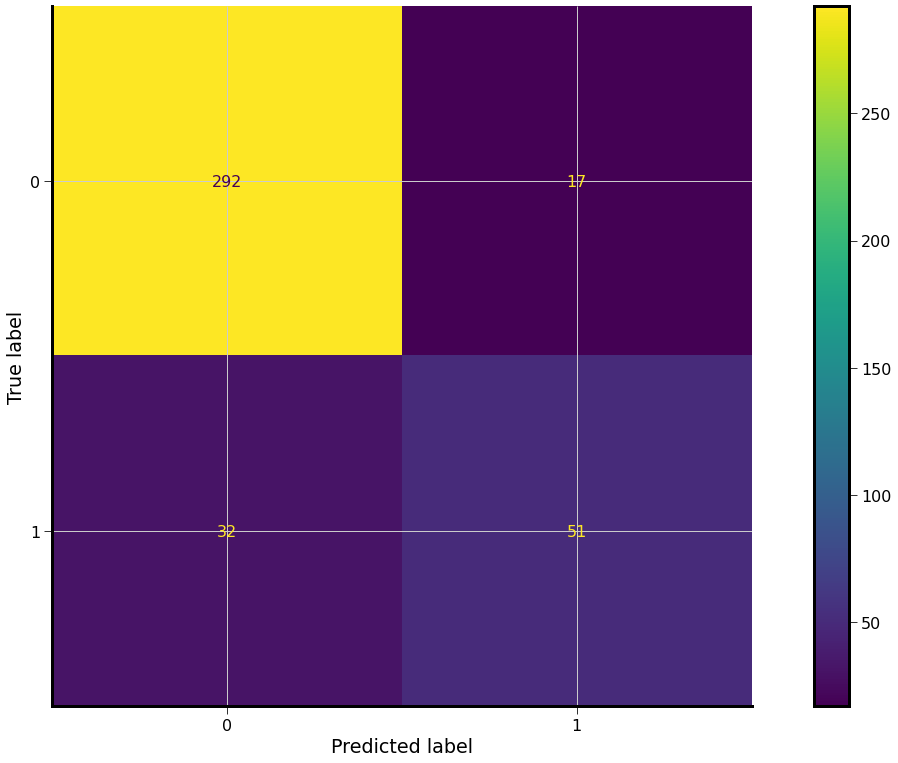

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator, df[['horsepower', 'weight']], y_true=df['fuel_saver'], normalize=None)

# Steckbrief Entscheidungsbaum

<center><img src="img/tafel_cart.png" width=60% class="stretch"></center>

# Die Drei Bestandteile des Fehlers

<center><img src="img/tafel_validierung.png" width=60% class="stretch"></center>

$$E\left(Y-\hat{f}(X)\right)^2 = \mathrm{Var}(\hat{f}(X))+ \left[\mathrm{Bias}(\hat{f}(X))\right]^2+ \mathrm{Var}(\epsilon)$$

* Wir sparen uns hier die Herleitung! (Lesehinweis: Introduction to Statistical Learning, Kapitel 2.2.2)
* $\mathrm{Var}(\hat{f}(x))$ ist die Varianz unseres Modells: Unser Modell variiert/schwankt stark mit den Trainingsdaten.
* $\left[\mathrm{Bias}(\hat{f}(x))\right]^2$ ist der Bias bzw. die Verzerrung des Modells: Die Annahmen des Modells stimmen nicht.
* $\mathrm{Var}(\epsilon)$ Ursache ist der zufallsbedingte Anteil unserer Daten, diesen Fehler ist nicht reduzierbar. 


# Test-Trainingsdaten

* Den **Underfit** merken wir schnell, der Score ist schlecht....
* Einen **Overfit** festzustellen, ist schwieriger. Auf den Trainingsdaten funktioniert das Modell schließlich gut
* Um diesem Effekt vorzubeugen, werden die Daten in einen Test und einen Trainingsdatensatz geteilt.
* Das Modell trainiert auf den Trainings-Daten und wird auf den Testdaten evaluiert.
* Das Modell mit der besten Performance auf den Test-Daten wird ausgewählt.
* Wichtig ist es hierbei eine "Ähnlichkeit" der Datensätze zu erhalten.

# Validierung Entscheidungsbaum

* Wir splitten den Datensatz in Trainings- und Test-Daten (80%, 20%)
* Der F1-Score wird für beide Datensätze berechnet.
* Das Modell mit dem höchsten Score für die Test-Daten ist für uns relevant.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# feature matrix
X = df[['horsepower', 'weight']]

# target vector
y = df['fuel_saver']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = 5, min_samples_split=0.0001, min_samples_leaf=1)
estimator.fit(X_train, y_train)

f1_score(y_test, estimator.predict(X_test)), f1_score(y_train, estimator.predict(X_train))

(0.4666666666666667, 0.7966101694915254)

# F1-Score für Test und Trainingsdaten

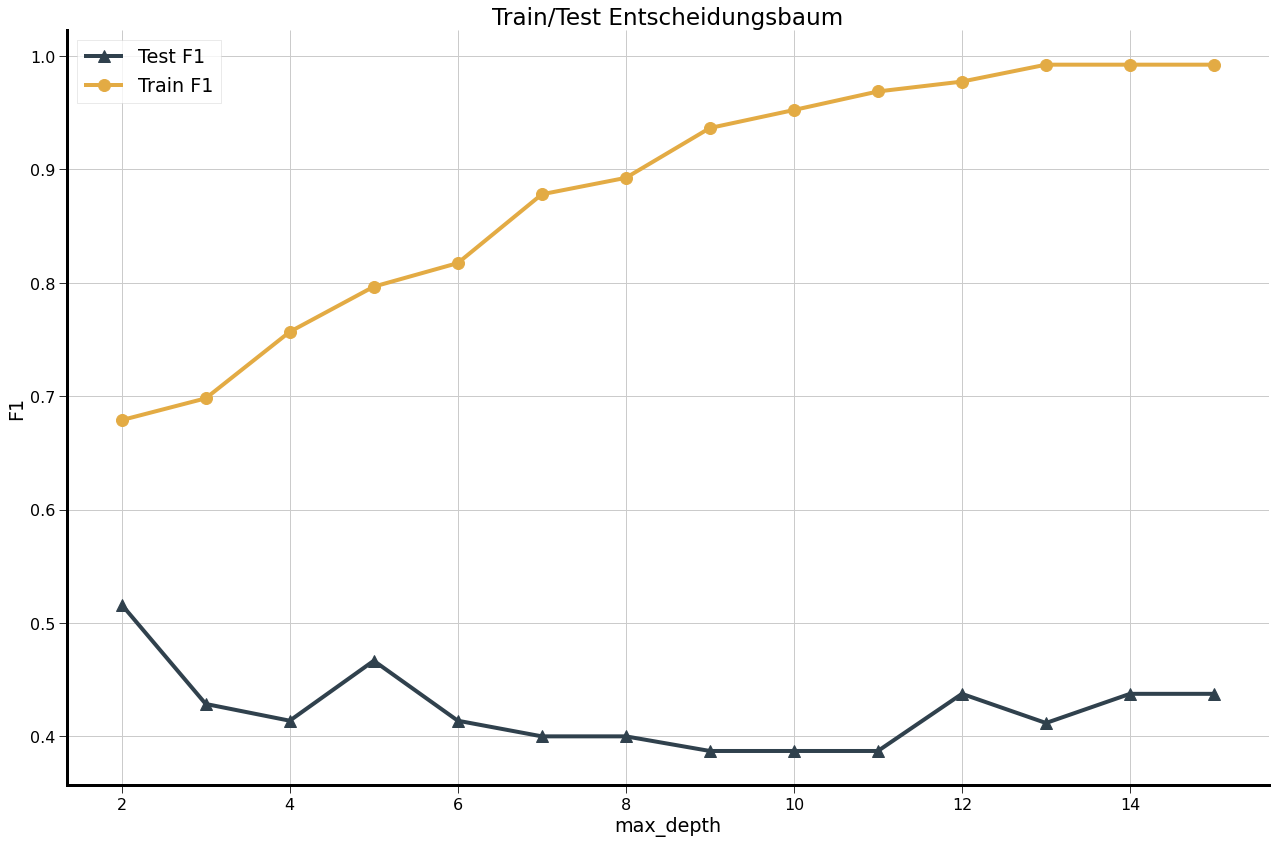

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# feature matrix
X = df[['horsepower', 'weight']]

# target vector
y = df['fuel_saver']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

test_f1 = []
train_f1 = []
depth = range(2,16)
for d in depth:
    estimator = DecisionTreeClassifier(random_state = 0 , criterion = 'gini', max_depth = d, min_samples_split=0.0001, min_samples_leaf=1)
    estimator.fit(X_train, y_train)
    test_f1.append(f1_score(y_test, estimator.predict(X_test)))
    train_f1.append(f1_score(y_train, estimator.predict(X_train)))
                    
        
fig, ax = plt.subplots(1, 1, figsize=plot_size)

ax.plot(depth,test_f1, '-^',label='Test F1' )
ax.plot(depth,train_f1, '-o',label='Train F1' )

ax.legend()
plt.title('Train/Test Entscheidungsbaum')
plt.ylabel('F1')
plt.xlabel('max_depth')
plt.tight_layout()
plt.show()

# Random Forest

<center><img src="img/tafel_random_forest.png" width=30% class="stretch"></center>

* Anstelle von Zeilen wählen wir zufällig Spalten aus. 
* Wenn ein Parameter dominant ist, filtern wir ihn regelmäßig heraus.
* Zu einem gewissen Teil wird damit der Geiz des Algorithmus umgangen.
* In der Praxis hat es sich bewährt $m=\sqrt p$ Parameter zu behalten.

# Algorithmus Random Forest

<center><img style="float: right;" src="img/tafel_random_forest.png" width=30% class="stretch"></center>

1. Trainiere $b$ Entscheidungsbäume:
    * Jeder Baum trainiert auf einem zufällig gezogenen Anteil der Daten **(Spalten)**.
    * Die Bäume werden nicht gestutzt ($\text{min_leaf} = 1$).


2. Werte alle Entscheidungsbäume aus.
    * Die resultierende Klasse entspricht der Mehrheit der Entscheidungen.
    * (Regression) Die Resultierende entspricht dem Durchschnitt der Antworten.
    

# Random Forest in Python

In [27]:
# 1. Trainiere b Entscheidungsbäume
from random import choices

def random_forest(X_train, y_train, b=50):
    trees = []
    for i in range(b):
        cols = choices(X_train.columns, k=3)
        # Wir müssen uns die Spalten merken, auf die der Baum trainiert wurde
        trees.append([cols, DecisionTreeClassifier().fit(X_train[cols].values, y_train)])
    return trees 

trees = random_forest(X_train, y_train)

In [28]:
# 2. Werte alle Entscheidungsbäume aus

def predict_random(X_test, trees):
    answers = []
    for x in X_test.iterrows():
        predictions = [t[1].predict(x[1][t[0]].values.reshape(1, -1)) for t in trees]
        answers.append(stats.mode(predictions)[0][0]) 
    return answers

y_predict = predict_random(X_test, trees)

f1_score(y_test, y_predict, average='weighted', labels=[1, 2, 3])

/Users/dboehnke/opt/anaconda3/envs/FunML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.43749999999999994

# Zusammenfassung Random Forest

<center><img style="float: right;" src="img/tafel_random_forest.png" width=30% class="stretch"></center>

* Wählt zufällig Spalten und nicht Zeilen aus.
* Beispieldatensatz hat nur eine geringe Anzahl von Spalten .
* Jede Reduktion hat starke Auswirkungen.
* Performance in diesem Fall schwach.

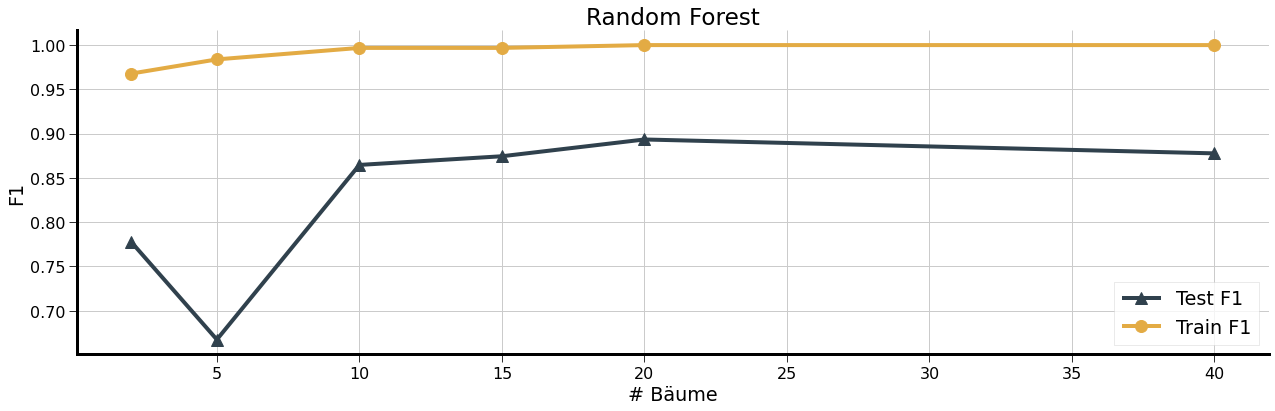

In [29]:
# feature matrix
X = df[['horsepower', 'weight', 'mpg', 'displacement', 'cylinders']]

# target vector
y = df['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

bs = [2, 5, 10, 15, 20, 40]
test_f1 = []
train_f1 = []
for b in bs:
    trees = random_forest(X_train, y_train,b=b)
    test_f1.append(f1_score(y_test, predict_random(X_test,trees), average='weighted', labels=[1, 2, 3]))
    train_f1.append(f1_score(y_train, predict_random(X_train, trees), average='weighted', labels=[1, 2, 3]))                    

fig, ax = plt.subplots(1, 1, figsize=half_plot_size)

ax.plot(bs,test_f1, '-^',label='Test F1' )
ax.plot(bs,train_f1, '-o',label='Train F1' )

ax.legend()
plt.title('Random Forest')
plt.ylabel('F1')
plt.xlabel('# Bäume')
plt.tight_layout()
plt.show()

# Zusammenfassung Theorie

* Daten laden
* Daten untersuchen / reparieren
* Daten manipulieren / Feature Engineering
* Daten splitten / Testverfahren
* Modell trainieren
* Modell bewerten